In [1]:
from mnist.loader import MNIST
import numpy as np
from pylab import *

In [2]:
def load_mnist_data():
    mnist=MNIST('dataset')
    ##train data
    train_images,train_labels=mnist.load_training()
    train_images=np.asarray(train_images)
    train_labels=np.asarray(train_labels)
    train_labels=train_labels.reshape([train_labels.shape[0],1])
    #print(mnist.display(train_images[5]))
    ##test data
    test_images,test_labels=mnist.load_testing()
    test_images=np.asarray(test_images)
    test_labels=np.asarray(test_labels)
    test_labels=test_labels.reshape([test_labels.shape[0],1])
    return train_images,train_labels,test_images,test_labels


In [3]:
def extract_digits(digits,train,test):
    digit1=digits[0]
    digit2=digits[1]
    #train
    train_images=train[0]
    train_labels=train[1]
    train_filter = np.where((train_labels == digit1 ) | (train_labels == digit2))
    X_train, Y_train = train_images[train_filter[0],:], train_labels[train_filter]
    Y_train=Y_train.reshape([Y_train.shape[0],1])
    Y_tr=np.where(Y_train==6,0,1)
    
    #test
    test_images=test[0]
    test_labels=test[1]
    test_filter = np.where((test_labels == digit1) | (test_labels == digit2))
    X_test, Y_test = test_images[test_filter[0],:], test_labels[test_filter]
    Y_test=Y_test.reshape([Y_test.shape[0],1])
    Y_t=np.where(Y_test==6,0,1)
    
    train_data=[X_train,Y_tr]
    test_data=[X_test,Y_t]
    
    
    return train_data, test_data
    
    
    

In [4]:
def max_normalization(X_train,X_test):
    X_train=X_train/255
    X_test=X_test/255
    return X_train,X_test

In [5]:
def initialize_parameters(n):
    #theta=np.random.randint(-1,2,size=[n,1])
    theta=np.zeros([n,1])
    return theta

In [6]:
def sigmoid(z):
    hx=1/(1+(np.exp(-z)))
    return hx

In [7]:
def cost(hx,X,y):
    m=y.shape[1]
    cost=-((1/m)*np.sum((y*np.log(hx)+(1-y)*(np.log(1-hx))))) 
    return cost
    

In [8]:
def derivative_of_cost(X,hx,y):
    m=y.shape[1]
    d_theeta=(1/m)*(np.sum(X*(hx-y),axis=1,keepdims=True))
    return d_theeta

In [9]:
def predict(theta, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    z=np.dot(theta.T,X)
    A =sigmoid(z)
    for i in range(A.shape[1]):
        Y_prediction[0,i]=np.where(A[0,i]>=0.5,1,0)        
    
    return Y_prediction


In [21]:
def confusion_matrix(Y_prediction,Y):
    ##compressed the 4 lines
    #condition_1 = (Y_prediction_test == 1)
    #condition_2 = (Y_test == 1)
    #part1 = np.where(condition_1 & condition_2)
    #result = len(part1[1])
    TP=len((np.where((Y_prediction == 1) & (Y == 1)))[1])
    TN=len((np.where((Y_prediction == 0) & (Y == 0)))[1])
    FP=len((np.where((Y_prediction == 1) & (Y == 0)))[1])
    FN=len((np.where((Y_prediction == 0) & (Y == 1)))[1])
    
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    recall=(TP)/(TP+FN)
    precision=(TP)/(TP+FP)
    return accuracy,recall,precision

In [11]:
def model(alpha,X,Y,num_of_iterations):
    m=Y.shape[1]
    costs=[]
    theta=initialize_parameters(X.shape[0])
    prev_weights=np.copy(theta)
    for i in range(num_of_iterations):
        z=np.dot(theta.T,X)
        hx=sigmoid(z)
        J=cost(hx,X,Y)
        der=derivative_of_cost(X,hx,Y)
        theta=theta-(alpha)*(der)
        if i % 50 == 0:
            costs.append(J)
            print("cost after "+str(i)+" iterations"+str(J))
    Y_prediction_test =predict(theta, X_test)
    Y_prediction_train = predict(theta, X_train)
    
    train_accuracy,train_recall,train_precision=confusion_matrix(Y_prediction_train,Y_train)
    test_accuracy,test_recall,test_precision=confusion_matrix(Y_prediction_test,Y_test)
    
    print("Train dataset:")
    print("Accuracy :"+str(train_accuracy))
    print("Recall :"+str(train_recall))
    print("Precision :"+str(train_precision))
    
    print("Test dataset:")
    print("Accuracy :"+str(test_accuracy))
    print("Recall :"+str(test_recall))
    print("Precision :"+str(test_precision))
    
    return costs
    
    

In [12]:
#load data
train_images,train_labels,test_images,test_labels=load_mnist_data()
train=[train_images,train_labels]
test=[test_images,test_labels]
digits=[6,9]


In [13]:
#extraction
train,test=extract_digits(digits,train,test)
X_train=train[0]
Y_train=train[1]
X_test=test[0]
Y_test=test[1]


[0]


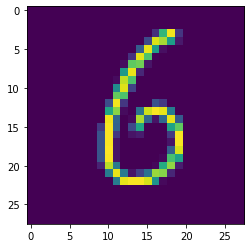

In [14]:
# view data
print(Y_train[2])
imshow(X_train[2].reshape(28,28))

In [15]:
# normalization
X_train,X_test=max_normalization(X_train,X_test)

In [16]:
#append X_train
X=np.ones([X_train.shape[0],1]) 
X_train=np.append(X,X_train,axis=1) #(m,n)
X_train=X_train.T #(n,m)
Y_train=Y_train.T #(1,m)

In [17]:
#append test
X=np.ones([X_test.shape[0],1]) 
X_test=np.append(X,X_test,axis=1) #(m,n)
X_test=X_test.T #(n,m)
Y_test=Y_test.T #(1,m)

In [18]:
X_train.shape

(785, 11867)

In [19]:
X_test.shape

(785, 1967)

In [22]:
costs=model(0.1,X_train,Y_train,num_of_iterations=500)

cost after 0 iterations0.6931471805599453
cost after 50 iterations0.0710498219713004
cost after 100 iterations0.04544607936010418
cost after 150 iterations0.035610072155499495
cost after 200 iterations0.030226503382465342
cost after 250 iterations0.026763796371254756
cost after 300 iterations0.02431785229687704
cost after 350 iterations0.022480630572009087
cost after 400 iterations0.021039335680845372
cost after 450 iterations0.01987142891127287
Train dataset:
Accuracy :0.9971349119406758
Recall :0.9964699949571356
Precision :0.9978118161925602
Test dataset:
Accuracy :0.9969496695475343
Recall :0.998017839444995
Precision :0.9960435212660732


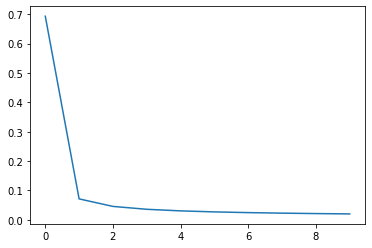

In [23]:
plot(costs)